# Honey Production

Machine learning practice with honey production data from kaggle.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

df = pd.read_csv("data.csv")

print(df.head())

  state    numcol  yieldpercol   totalprod      stocks  priceperlb  \
0    AL   16000.0           71   1136000.0    159000.0        0.72   
1    AZ   55000.0           60   3300000.0   1485000.0        0.64   
2    AR   53000.0           65   3445000.0   1688000.0        0.59   
3    CA  450000.0           83  37350000.0  12326000.0        0.62   
4    CO   27000.0           72   1944000.0   1594000.0        0.70   

    prodvalue  year  
0    818000.0  1998  
1   2112000.0  1998  
2   2033000.0  1998  
3  23157000.0  1998  
4   1361000.0  1998  


In [26]:
prod_per_year = df.groupby("year").mean("totalprod").reset_index()
print(prod_per_year)

    year        numcol  yieldpercol     totalprod        stocks  priceperlb  \
0   1998  60953.488372    69.953488  5.105093e+06  1.873605e+06    0.832558   
1   1999  61325.581395    65.465116  4.706674e+06  1.823023e+06    0.804186   
2   2000  60558.139535    67.581395  5.106000e+06  1.975721e+06    0.791395   
3   2001  57772.727273    64.545455  4.221545e+06  1.471909e+06    0.911818   
4   2002  58295.454545    66.795455  3.892386e+06  8.903864e+05    1.371364   
5   2003  58886.363636    62.545455  4.122091e+06  9.231591e+05    1.494773   
6   2004  61926.829268    64.804878  4.456805e+06  1.487341e+06    1.284634   
7   2005  58390.243902    64.268293  4.243146e+06  1.516756e+06    1.195122   
8   2006  58000.000000    61.853659  3.761902e+06  1.469146e+06    1.303659   
9   2007  59219.512195    59.170732  3.600512e+06  1.278171e+06    1.438293   
10  2008  56731.707317    61.000000  3.974927e+06  1.243805e+06    1.625610   
11  2009  61800.000000    53.850000  3.626700e+06  9

In [28]:
X = prod_per_year.year

In [30]:
X = X.values.reshape(-1,1)

In [31]:
y = prod_per_year.totalprod

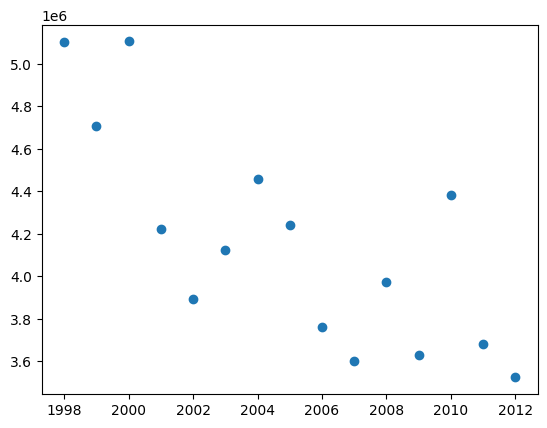

<Figure size 640x480 with 0 Axes>

In [50]:
plt.scatter(X,y)
plt.show()
plt.clf()

In [44]:
regr = linear_model.LinearRegression().fit(X,y)

In [46]:
print(f"m: {regr.coef_}")
print(f"b: {regr.intercept_}")

m: [-88303.18915238]
b: 181208083.1073298


In [47]:
y_predict = regr.predict(X)
print(y_predict)

[4778311.18087068 4690007.99171829 4601704.8025659  4513401.61341354
 4425098.42426115 4336795.23510876 4248492.04595637 4160188.85680401
 4071885.66765162 3983582.47849923 3895279.28934684 3806976.10019448
 3718672.91104209 3630369.7218897  3542066.53273734]


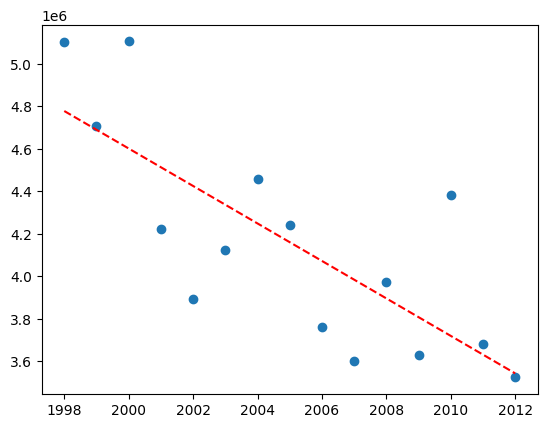

In [57]:
plt.scatter(X,y)
plt.plot(X,y_predict, linestyle="--", color="red")
plt.show()